In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('Updated_customer_aggregated_yearly_data.xlsx')

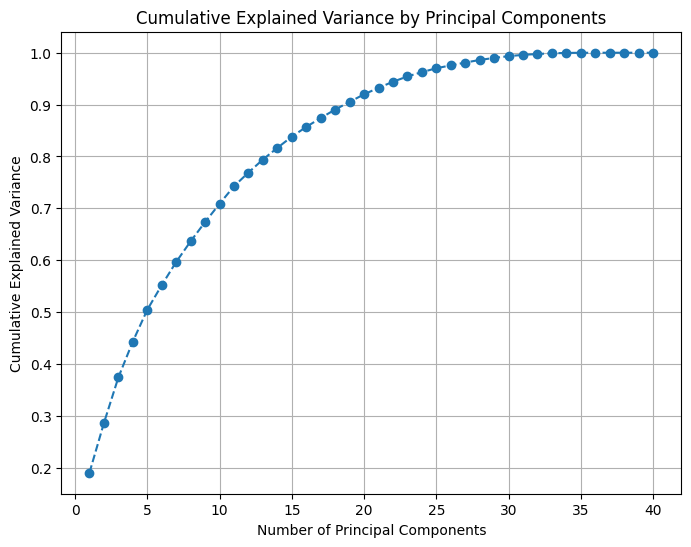

In [2]:
selected_columns = ['CustomerID', 'Start Year', 'Cleaned_Insured name', 'Policy Start Date', 'Policy End Date', 'Reg no ',
       'MANUFACTURER/Make', 'model', 'variant', 'Fuel Type', 'RTO Location ',
       'Product name ', 'Product name  2', 'biztype', 'Renewal Type', 'age',
       'Vehicle Segment', 'Number of Vehicles', 'Number of Policies',
       'Total Premium Payable (Overall)', 'Total OD Premium (Overall)',
       'Total TP Premium (Overall)', 'Total Add on Premium (Overall)',
       'Total GST (Overall)', 'Average Discount (Overall)',
       'Average NCB % Previous Year (Overall)', 'Number of Claims',
       'Number of Declines', 'New Branch Name  2', 'Policy Status',  
       'Not Renewed', 'Open', 'Renewed', 'Renewal Rate', 'Churn Label', 'New Customer', 'Customer Tenure ']

data = data[selected_columns]

# Fill missing values for both categorical and numerical columns
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].fillna('missing')
    else:
        data[column] = data[column].fillna(0)

# Convert necessary date columns to datetime format
date_columns = ['Policy Start Date', 'Policy End Date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')

# Extract year, month, and day as separate features for all date columns
new_date_cols = {}
for col in date_columns:
    new_date_cols[f'{col}_YEAR'] = data[col].dt.year.fillna(0).astype(int)
    new_date_cols[f'{col}_MONTH'] = data[col].dt.month.fillna(0).astype(int)
    new_date_cols[f'{col}_DAY'] = data[col].dt.day.fillna(0).astype(int)

# Use pd.concat to add these new columns efficiently
data = pd.concat([data, pd.DataFrame(new_date_cols)], axis=1)

# Drop the original date columns after extracting year, month, and day
data = data.drop(date_columns, axis=1)


# Label encode categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    # Ensure all values in the column are strings before encoding
    data[col] = data[col].astype(str)
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Standardize the data (numerical columns only)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop('Churn Label', axis=1, errors='ignore'))  

# Perform PCA without specifying n_components to visualize explained variance
pca = PCA()
pca.fit(data_scaled)

# Plot cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [3]:
# Choose a specific number of principal components based on the explained variance plot
pca = PCA(n_components=20)  # Adjust the number based on desired variance retention
principal_components = pca.fit_transform(data_scaled)

# Convert the PCA result back into a DataFrame for further analysis
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 21)])
pca_df['Churn Label'] = data['Churn Label'].values  # Include the target column for reference

# Save the PCA results to CSV if needed
pca_df.to_csv('pca_result_reduced (up_selected) 20.csv', index=False)

# Calculate the sum of the absolute contributions of each feature across all components
original_feature_names = data.columns.drop('Churn Label')  # Exclude 'Status' from feature names
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)
feature_importance = pca_components.abs().sum(axis=0)

# Convert the feature importance to a DataFrame
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort features by their total contribution in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save the summed absolute contributions to a CSV file
sorted_feature_importance.to_csv('pca_feature_importance_summed (up_selected) 20.csv', index=True)

# Print the top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                                        Total Contribution
Fuel Type                                        3.285800
Vehicle Segment                                  3.263608
Reg no                                           3.085027
Open                                             3.024691
Average NCB % Previous Year (Overall)            2.852247
Number of Declines                               2.809938
RTO Location                                     2.761504
biztype                                          2.676894
Product name                                     2.642867
New Branch Name  2                               2.510725


In [4]:
# Choose a specific number of principal components based on the explained variance plot
pca = PCA(n_components=25)  # Adjust the number based on desired variance retention
principal_components = pca.fit_transform(data_scaled)

# Convert the PCA result back into a DataFrame for further analysis
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, 26)])
pca_df['Churn Label'] = data['Churn Label'].values  # Include the target column for reference

# Save the PCA results to CSV if needed
pca_df.to_csv('pca_result_reduced (up_selected) 25.csv', index=False)

# Calculate the sum of the absolute contributions of each feature across all components
original_feature_names = data.columns.drop('Churn Label')  # Exclude 'Status' from feature names
pca_components = pd.DataFrame(pca.components_, columns=original_feature_names)
feature_importance = pca_components.abs().sum(axis=0)

# Convert the feature importance to a DataFrame
feature_importance_df = pd.DataFrame(feature_importance, columns=['Total Contribution'])

# Sort features by their total contribution in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Total Contribution', ascending=False)

# Save the summed absolute contributions to a CSV file
sorted_feature_importance.to_csv('pca_feature_importance_summed (up_selected) 25.csv', index=True)

# Print the top 10 contributing features
print("Top 10 Contributing Features:\n", sorted_feature_importance.head(10))

Top 10 Contributing Features:
                                        Total Contribution
Vehicle Segment                                  3.984423
Fuel Type                                        3.905916
Average NCB % Previous Year (Overall)            3.681805
Number of Declines                               3.487408
Reg no                                           3.261973
Average Discount (Overall)                       3.259089
Open                                             3.211327
Renewal Type                                     3.090845
Number of Claims                                 3.079480
Product name                                     3.001621


In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_excel('Updated_customer_aggregated_yearly_data.xlsx')

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# List of selected columns
selected_columns = ['CustomerID', 'Start Year', 'Cleaned_Insured name', 'Policy Start Date', 'Policy End Date', 'Reg no ',
       'MANUFACTURER/Make', 'model', 'variant', 'Fuel Type', 'RTO Location ',
       'Product name ', 'Product name  2', 'biztype', 'Renewal Type', 'age',
       'Vehicle Segment', 'Number of Vehicles', 'Number of Policies',
       'Total Premium Payable (Overall)', 'Total OD Premium (Overall)',
       'Total TP Premium (Overall)', 'Total Add on Premium (Overall)',
       'Total GST (Overall)', 'Average Discount (Overall)',
       'Average NCB % Previous Year (Overall)', 'Number of Claims',
       'Number of Declines', 'New Branch Name  2', 'Policy Status', 
       'Not Renewed', 'Open', 'Renewed', 'Renewal Rate', 'Churn Label', 'New Customer', 'Customer Tenure ']

data = data[selected_columns]

# Subset the dataset with only the selected columns
data = data[selected_columns]

# Handle date columns - Extract year, month, day
date_columns = ['Policy Start Date', 'Policy End Date']
for col in date_columns:
    data[col] = pd.to_datetime(data[col], errors='coerce')  # Convert to datetime
    data[f'{col}_Year'] = data[col].dt.year.fillna(0)
    data[f'{col}_Month'] = data[col].dt.month.fillna(0)
    data[f'{col}_Day'] = data[col].dt.day.fillna(0)

# Drop original date columns
data = data.drop(columns=date_columns)

# Separate the target column 'Status'
target = data['Churn Label']

# Encode categorical columns into numerical values using LabelEncoder
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Encode each categorical column
    label_encoders[col] = le

# Exclude 'Status' and DateTime columns from the dataset
non_numeric_columns = data.select_dtypes(include=['datetime64', 'object']).columns
data_numeric = data.drop(columns=non_numeric_columns)  # Drop DateTime and object columns

# Fill missing values (NaN) with 0
data_numeric_filled = data_numeric.fillna(0)

# Standardize the data (only numerical columns, excluding 'Status')
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric_filled.drop('Churn Label', axis=1, errors='ignore'))  

        LD1
0  5.073180
1  5.006602
2  5.188740
3  5.058198
4  4.818800
Top Features by Importance:
                            Feature  Importance
27                    Policy Status   94.886076
21              Total GST (Overall)   28.057360
17  Total Premium Payable (Overall)   25.764378
15               Number of Vehicles   12.665735
32                     New Customer    6.963393
28                      Not Renewed    6.256490
31                     Renewal Rate    6.010813
35          Policy Start Date_Month    5.630946
16               Number of Policies    4.753328
38            Policy End Date_Month    4.437622


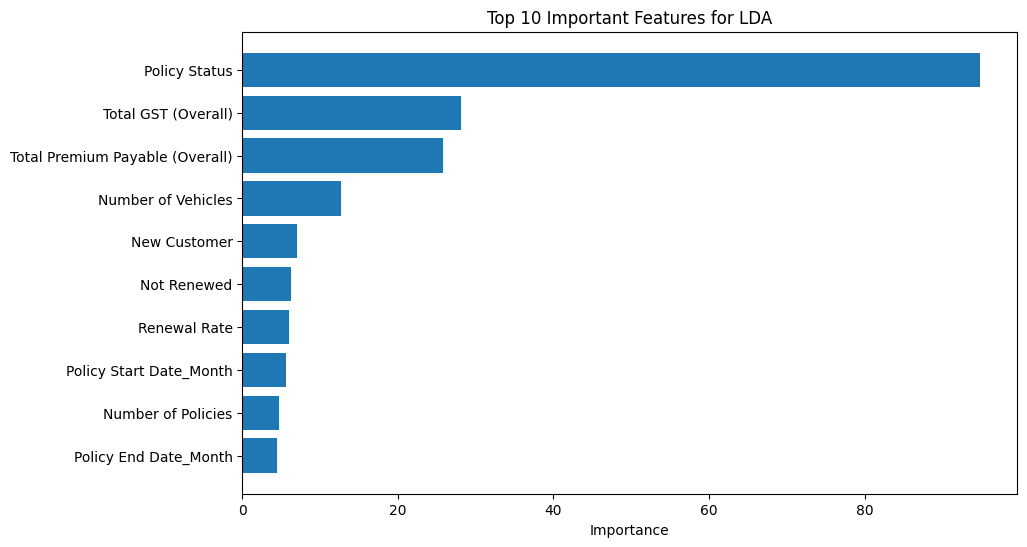

In [7]:
# Calculate the number of classes in the 'Status' column
n_classes = target.nunique()

# Calculate the number of features in the scaled dataset
n_features = data_scaled.shape[1]

# Determine the maximum number of components for LDA
n_components = min(n_classes - 1, n_features)

# Apply LDA with the calculated number of components
lda = LDA(n_components=n_components)
principal_components = lda.fit_transform(data_scaled, target)  # LDA requires both features and target

# Convert the LDA result back into a DataFrame for further analysis
lda_df = pd.DataFrame(data=principal_components, columns=[f'LD{i}' for i in range(1, n_components + 1)])

# Optionally save the LDA result to CSV for further analysis
lda_df.to_csv('lda_result_reduced select.csv', index=False)

# Display the first few rows of the LDA-transformed data
print(lda_df.head())

# Get the feature names and LDA coefficients
feature_names = data_numeric_filled.drop('Churn Label', axis=1, errors='ignore').columns
lda_coefficients = lda.coef_

# Compute feature importance based on the LDA coefficients
import numpy as np
abs_coefficients = np.abs(lda_coefficients).sum(axis=0)
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': abs_coefficients})

# Sort by importance
sorted_feature_importance = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print("Top Features by Importance:")
print(sorted_feature_importance.head(10))  # Display top 10 features

# Optionally, save the sorted feature importance to CSV
sorted_feature_importance.to_csv('lda_feature_importance select.csv', index=False)

# Optional: Visualize the top 10 most important features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_importance['Feature'].head(10), sorted_feature_importance['Importance'].head(10))
plt.xlabel('Importance')
plt.title('Top 10 Important Features for LDA')
plt.gca().invert_yaxis()
plt.show()